In [1]:
#BASIC IMPORT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# IMPORT CSV AND DATA FRAME 
rawdf = pd.read_csv('data/stud.csv')
rawdf.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(f'SHAPE OF DATASET --> {rawdf.shape}\n')
print(f'COLUMNS NAME -->\n {rawdf.columns}')

SHAPE OF DATASET --> (1000, 8)

COLUMNS NAME -->
 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


### DATA CHECKS TO PERFORM

>MISSING VALUES 
<br>
observation: there is no missing values 

In [5]:
print(f'MISSING VALUES IN EACH COLUMN-->\n\n{rawdf.isna().sum()}')

MISSING VALUES IN EACH COLUMN-->

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


>DUPLICATES
<br>
observation: no duplicates

In [6]:
print(f'DUPLICATES VALUES IN EACH COLUMN-->\n\n{rawdf.duplicated().sum()}')

DUPLICATES VALUES IN EACH COLUMN-->

0


>DATA TYPES 
<br>
observation: 5 categorical and scores are numerical

In [7]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


>NUMBER OF UNIQUE VALUES IN EACH COLUMN
<br>
observation: every column has some unique feature we'll have to compare many features with each other

In [8]:
rawdf.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

>STATISTICS OF DATA SET (DESCRIBE)
<br>
observation: <br>
<ul>
<li> means are close to each other btwn 66 to 68.9</li>
<li> std is also very close to each other </li>
<li> while there is minimum marks for maths = 0, min marks for writing and reading = 10, 17 respectively </li>
</ul>

In [9]:
rawdf.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


>VARIOUS CATEGOREIS PRESENT IN DIFFERENT CATEGORICAL COL. 
<br>
observation: printed below the cell 


In [10]:
# how many unique categories are present in object data type columns.
print(f'categories in gender column\n{rawdf.gender.unique()}\n')
print(f'categories in race_ethnicity column\n{rawdf.race_ethnicity.unique()}\n')
print(f'categories in parental_level_of_education column\n{rawdf.parental_level_of_education.unique()}\n')
print(f'categories in lunch column\n{rawdf.lunch.unique()}\n')
print(f'categories in test_preparation_course column\n{rawdf.test_preparation_course.unique()}\n')

categories in gender column
['female' 'male']

categories in race_ethnicity column
['group B' 'group C' 'group A' 'group D' 'group E']

categories in parental_level_of_education column
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

categories in lunch column
['standard' 'free/reduced']

categories in test_preparation_course column
['none' 'completed']



##### checking how many numerical and categorical data types columns are there in the dataset

In [11]:
numeric_features = [feature for feature in rawdf.columns if rawdf[feature].dtype != object]
categorical_features = [feature for feature in rawdf.columns if rawdf[feature].dtype == object]

print(f'we have {len(numeric_features)} numerical features -->\n{numeric_features}\n')
print(f'we have {len(categorical_features)} categorical features -->\n{categorical_features}')

we have 3 numerical features -->
['math_score', 'reading_score', 'writing_score']

we have 5 categorical features -->
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### adding columns to create a output variable i.e. TOTAL SCORE and AVERAGE

In [12]:
rawdf['totalScore'] = rawdf['math_score'] + rawdf['writing_score'] + rawdf['reading_score']
rawdf['average'] = rawdf['totalScore']/3
rawdf.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,totalScore,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
fullmaths = rawdf[rawdf['math_score']==100]['totalScore'].count()
fullwriting = rawdf[rawdf['writing_score']==100]['totalScore'].count()
fullreading = rawdf[rawdf['reading_score']==100]['totalScore'].count()

print(f'no. of students with full marks in maths: {fullmaths}')
print(f'no. of students with full marks in writing: {fullwriting}')
print(f'no. of students with full marks in reading: {fullreading}')

no. of students with full marks in maths: 7
no. of students with full marks in writing: 14
no. of students with full marks in reading: 17


In [14]:
lessmaths = rawdf[rawdf['math_score']<=20]['totalScore'].count()
lesswriting = rawdf[rawdf['writing_score']<=20]['totalScore'].count()
lessreading = rawdf[rawdf['reading_score']<=20]['totalScore'].count()

print(f'no. of students with less marks in maths: {lessmaths}')
print(f'no. of students with less marks in writing: {lesswriting}')
print(f'no. of students with less marks in reading: {lessreading}')

no. of students with less marks in maths: 4
no. of students with less marks in writing: 3
no. of students with less marks in reading: 1


# EDA


<Axes: xlabel='average', ylabel='Count'>

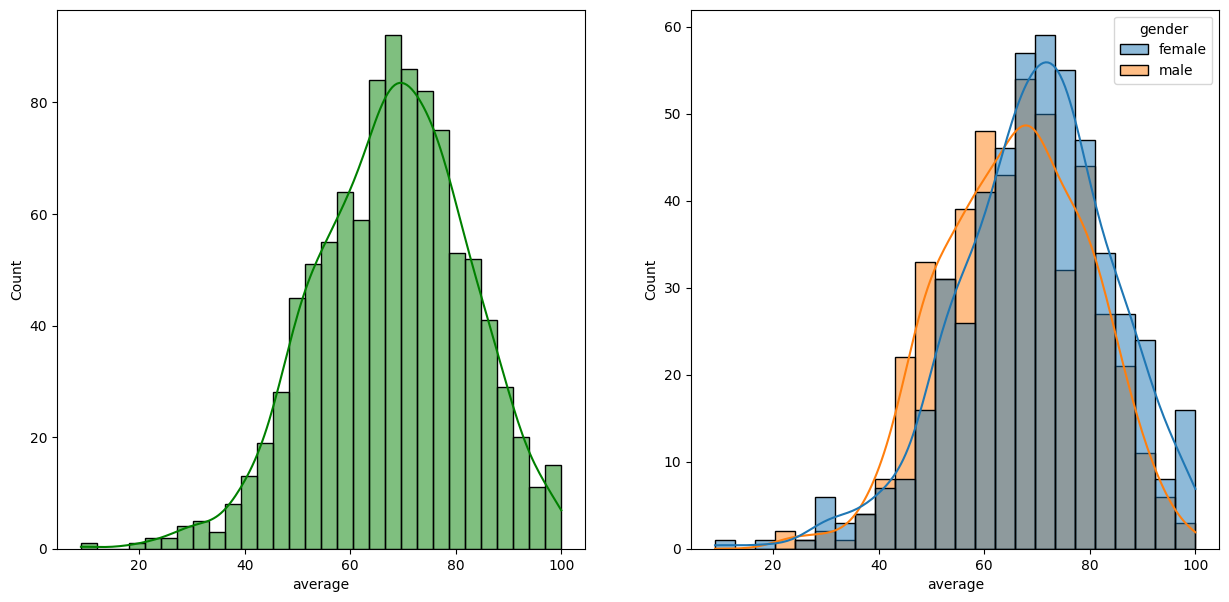

In [15]:
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sb.histplot(data=rawdf, x='average', bins=30, kde=True, color='g')

plt.subplot(122)
sb.histplot(data=rawdf, x='average', hue='gender', kde=True)



observation <br>
>female tend to perform better than males on average

<Axes: xlabel='average', ylabel='Count'>

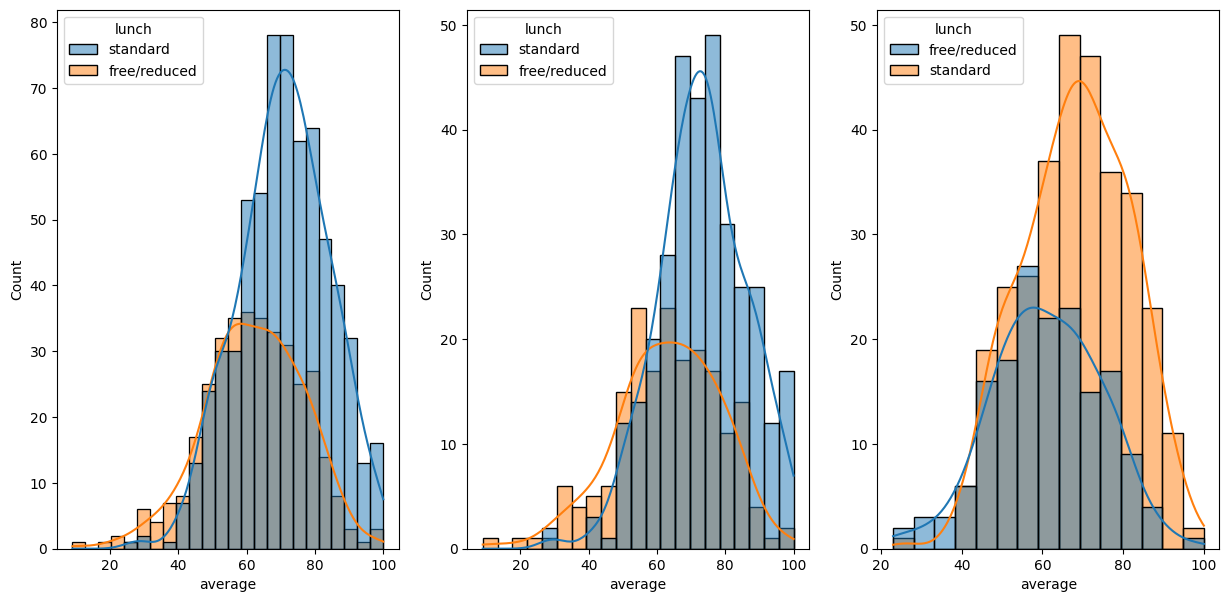

In [16]:
fig, axs= plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sb.histplot(data=rawdf, x='average', hue='lunch',kde=True)

plt.subplot(132)
sb.histplot(data=rawdf[rawdf.gender == 'female'], x='average', hue='lunch', kde=True)

plt.subplot(133)
sb.histplot(data=rawdf[rawdf.gender == 'male'], x='average', hue='lunch', kde=True)

observation <br>
>standard lunch helps perform well in exams be it female or male

In [17]:
rawdf.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'totalScore', 'average'],
      dtype='object')

<Axes: xlabel='average', ylabel='Count'>

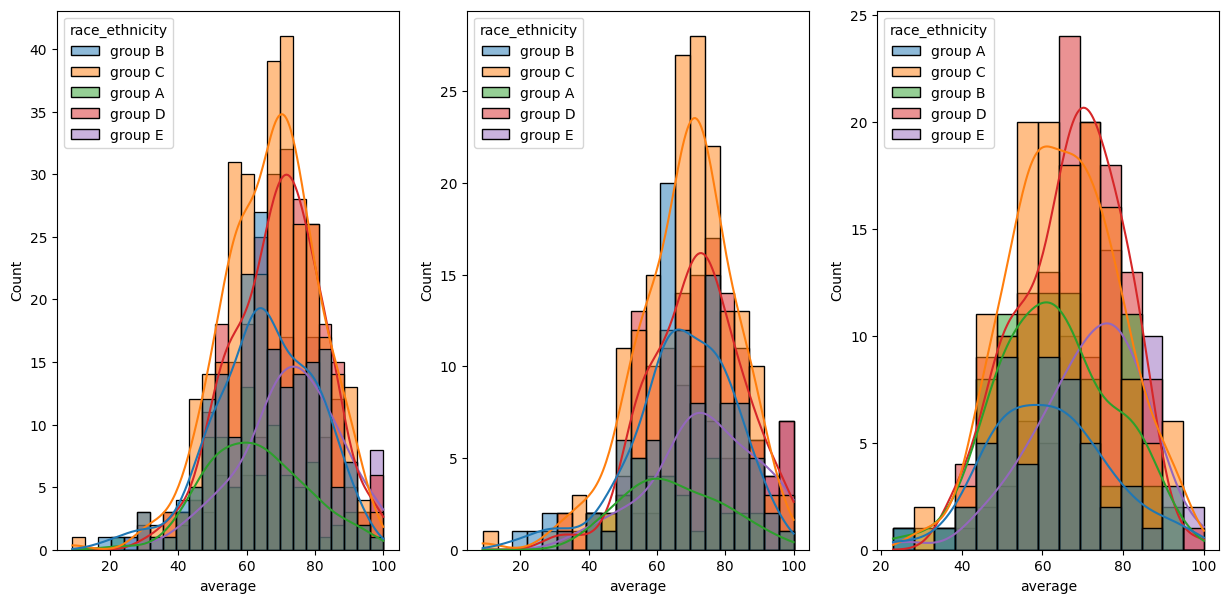

In [18]:
fig, axs= plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sb.histplot(data=rawdf, x='average', hue='race_ethnicity',kde=True)

plt.subplot(132)
sb.histplot(data=rawdf[rawdf.gender == 'female'], x='average', hue='race_ethnicity', kde=True)

plt.subplot(133)
sb.histplot(data=rawdf[rawdf.gender == 'male'], x='average', hue='race_ethnicity', kde=True)

<Axes: xlabel='average', ylabel='Count'>

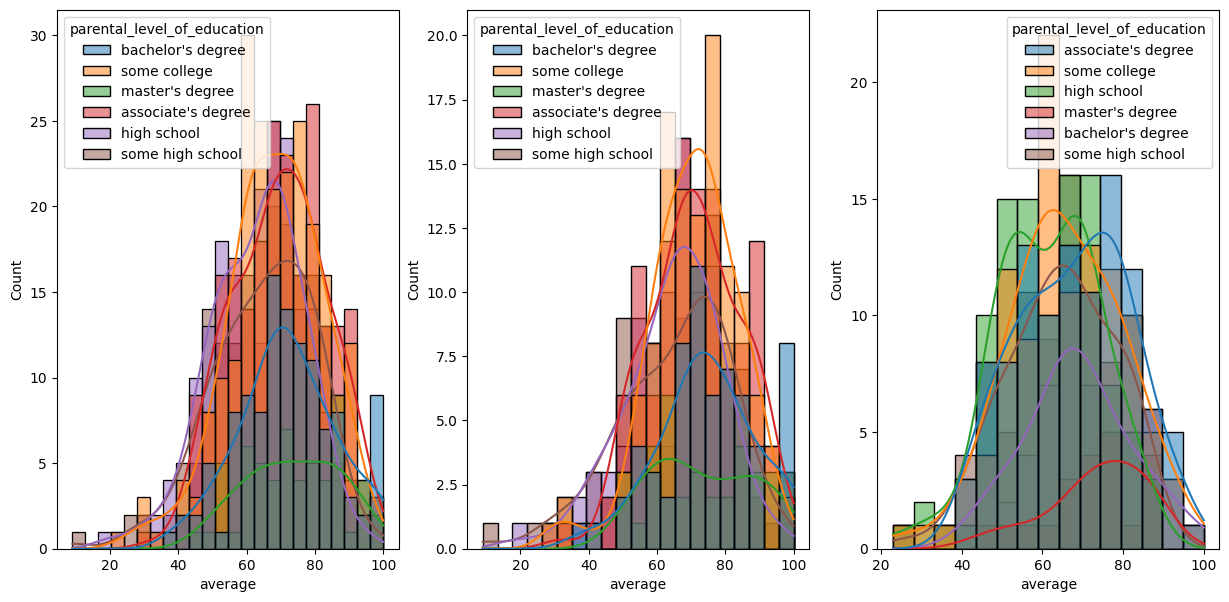

In [19]:
fig, axs= plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sb.histplot(data=rawdf, x='average', hue='parental_level_of_education',kde=True)

plt.subplot(132)
sb.histplot(data=rawdf[rawdf.gender == 'female'], x='average', hue='parental_level_of_education', kde=True)

plt.subplot(133)
sb.histplot(data=rawdf[rawdf.gender == 'male'], x='average', hue='parental_level_of_education', kde=True)

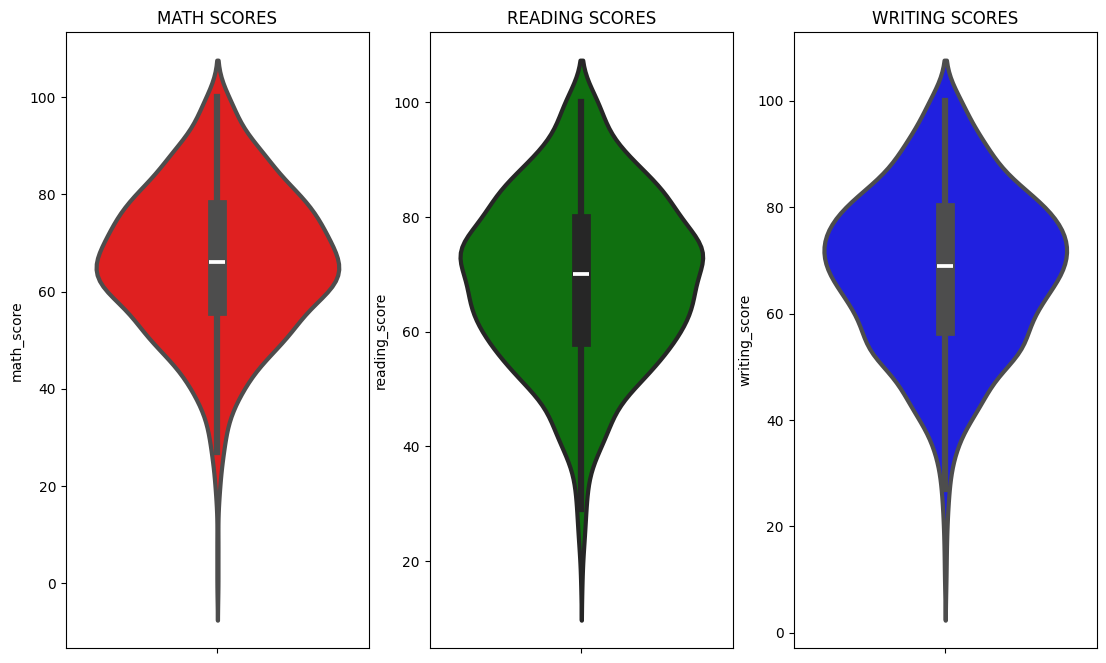

In [20]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sb.violinplot(y='math_score',data=rawdf,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sb.violinplot(y='reading_score',data=rawdf,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sb.violinplot(y='writing_score',data=rawdf,color='blue',linewidth=3)
plt.show()

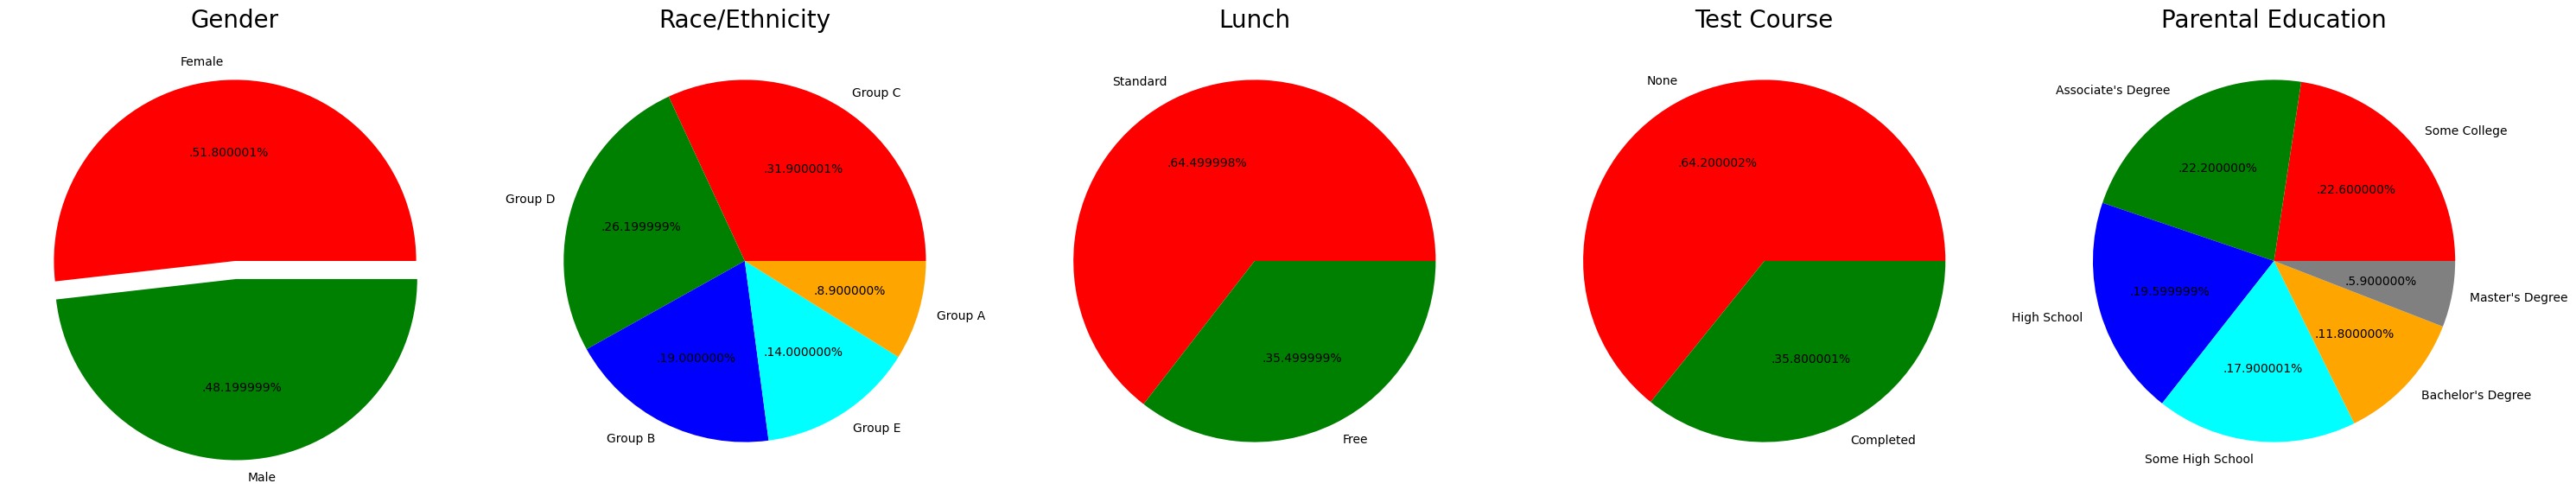

In [21]:

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = rawdf['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%',explode=[0,0.1])
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = rawdf['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = rawdf['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = rawdf['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = rawdf['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

>how is distribution of genders in the dataset

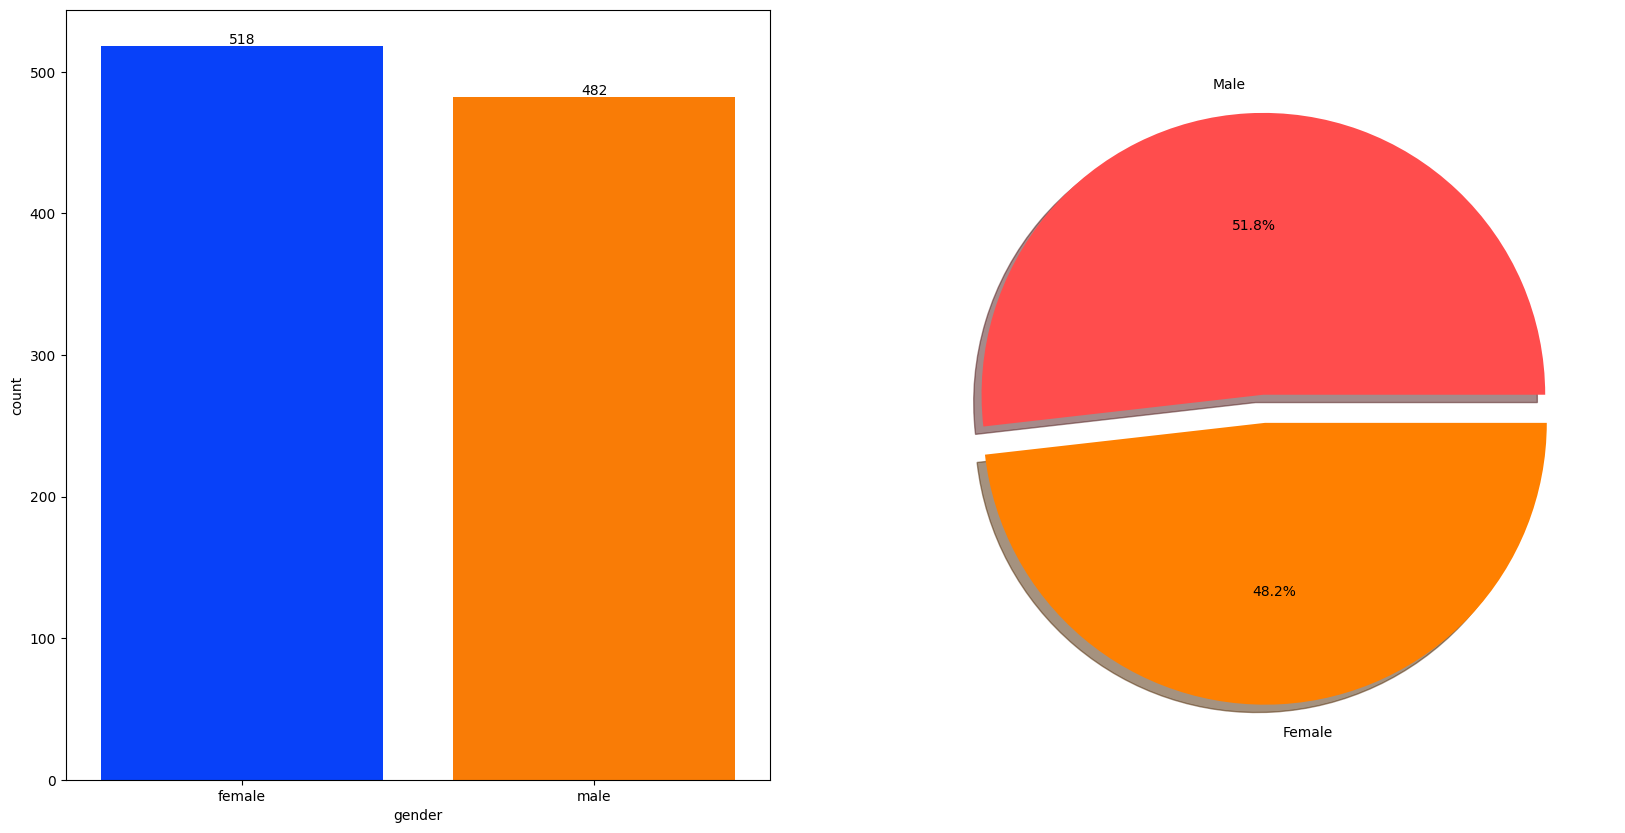

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sb.countplot(x=rawdf['gender'],data=rawdf,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

# sb.countplot(x=rawdf['gender'], data=rawdf, palette='bright')
    
plt.pie(x=rawdf['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

>does gender has any impact on final score ?

In [23]:
gendergrp = rawdf.groupby('gender').mean(numeric_only=True)

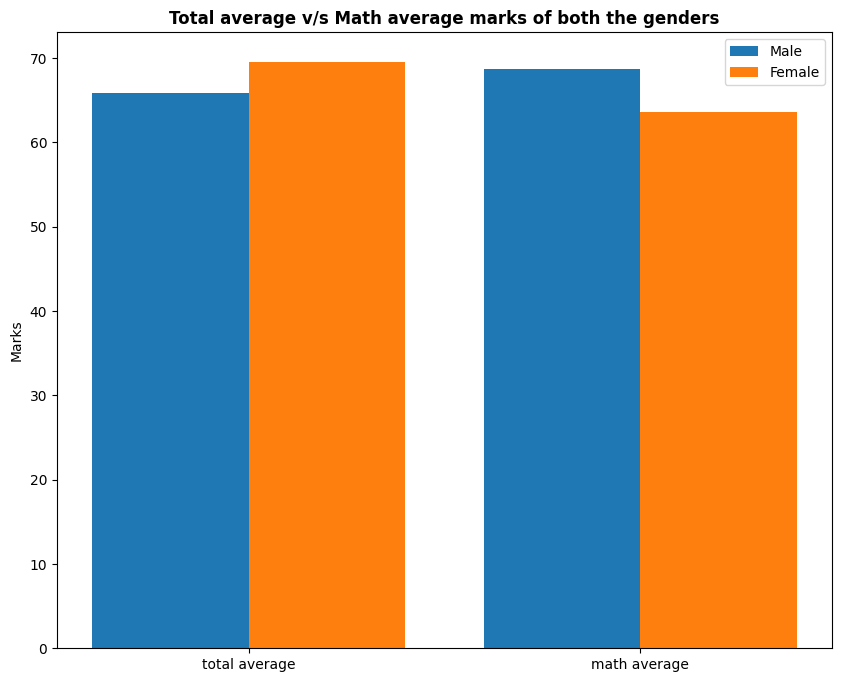

In [24]:
plt.figure(figsize=(10,8))

x=['total average', 'math average']

femalescores = [gendergrp['average'][0], gendergrp['math_score'][0]]
malescores = [gendergrp['average'][1], gendergrp['math_score'][1]]
X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, malescores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, femalescores, 0.4, label = 'Female')
  
plt.xticks(X_axis, x)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

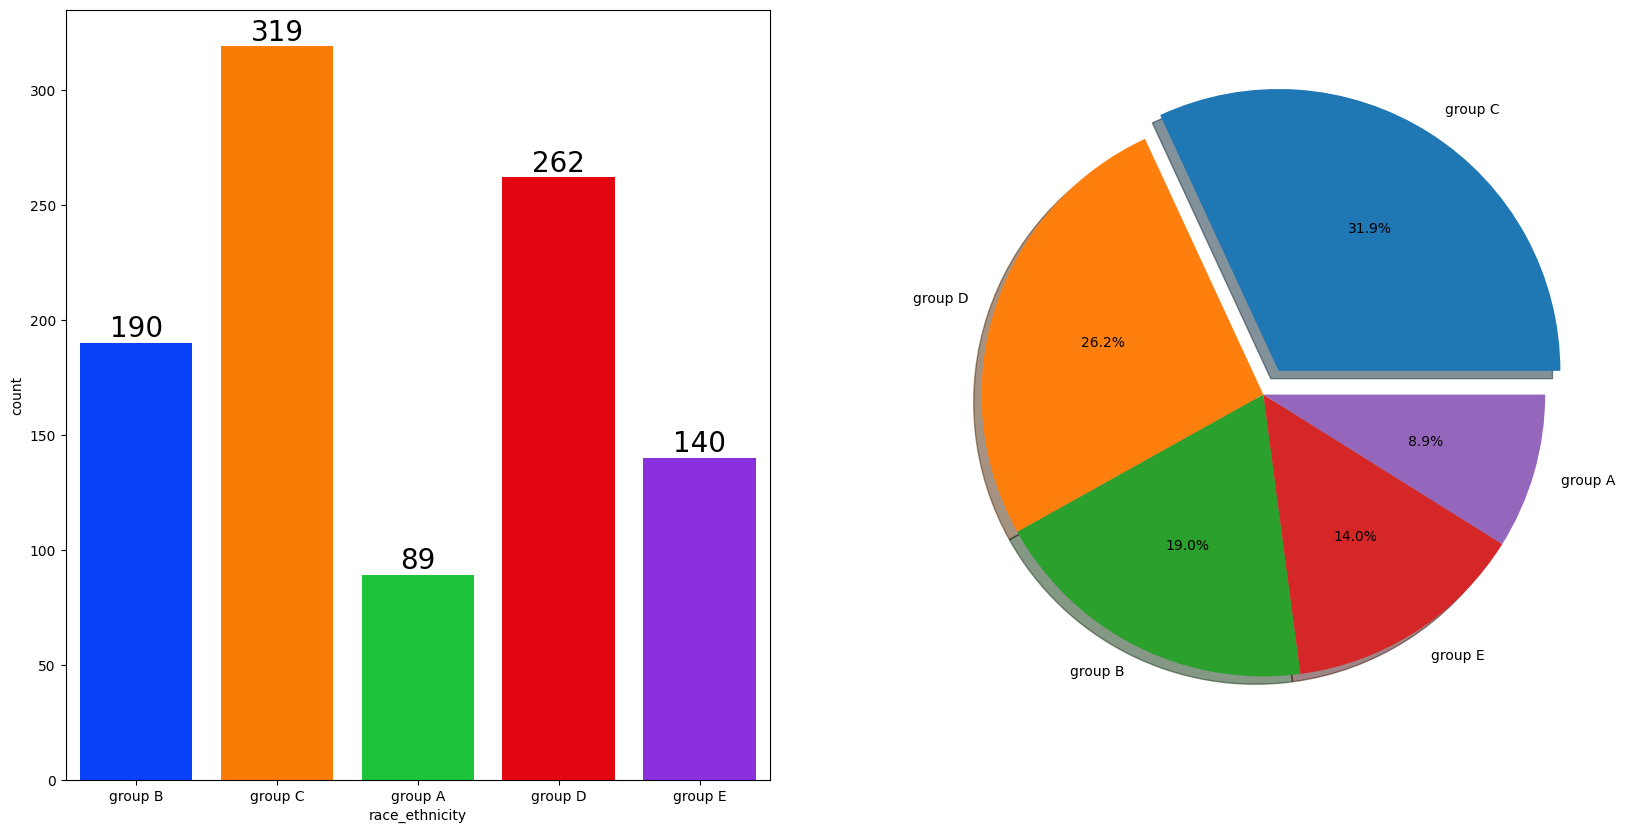

In [25]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sb.countplot(x=rawdf['race_ethnicity'],data=rawdf,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = rawdf['race_ethnicity'].value_counts(),labels=rawdf['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

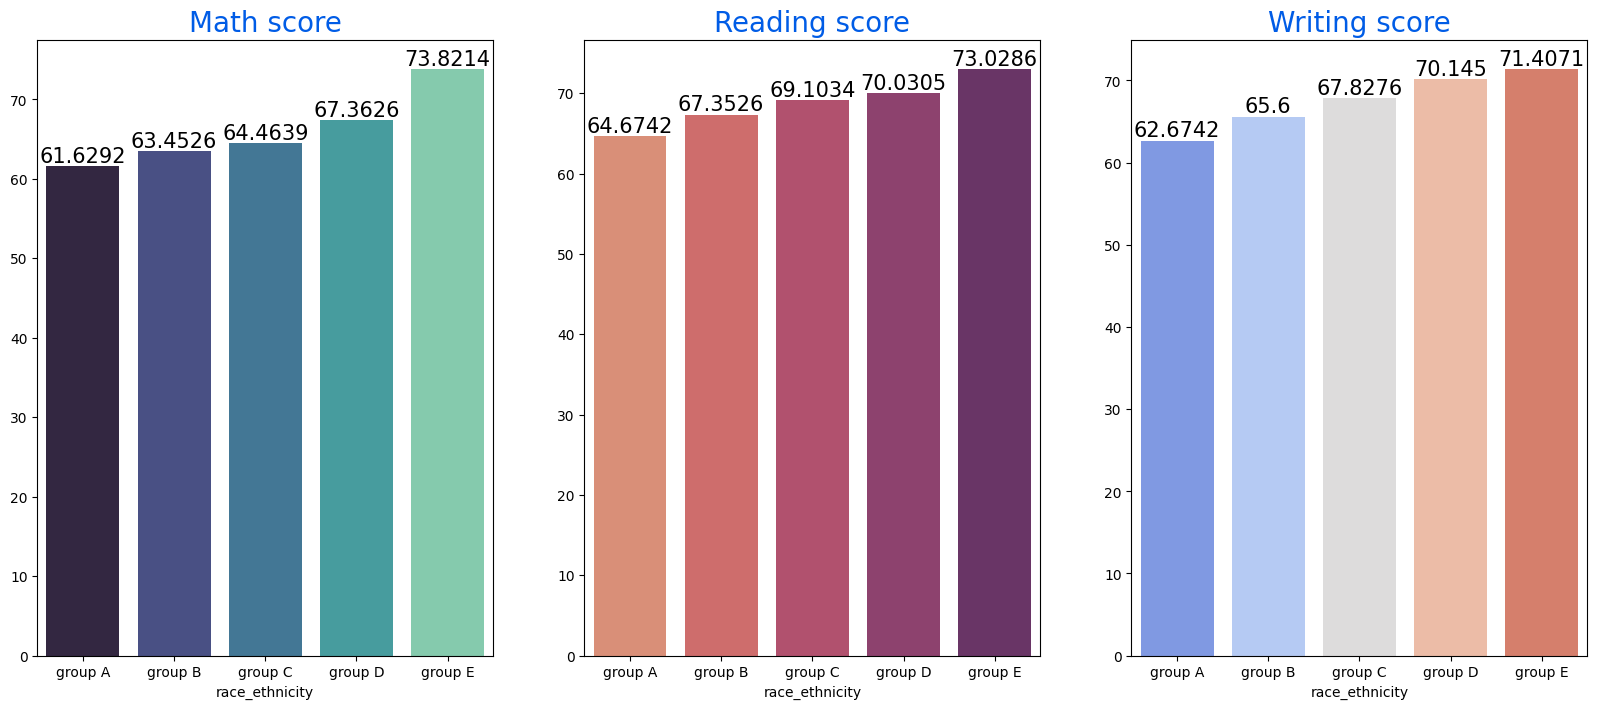

In [26]:

Group_data2=rawdf.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sb.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sb.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sb.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [27]:
Group_data2['math_score'].mean().index

Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object', name='race_ethnicity')

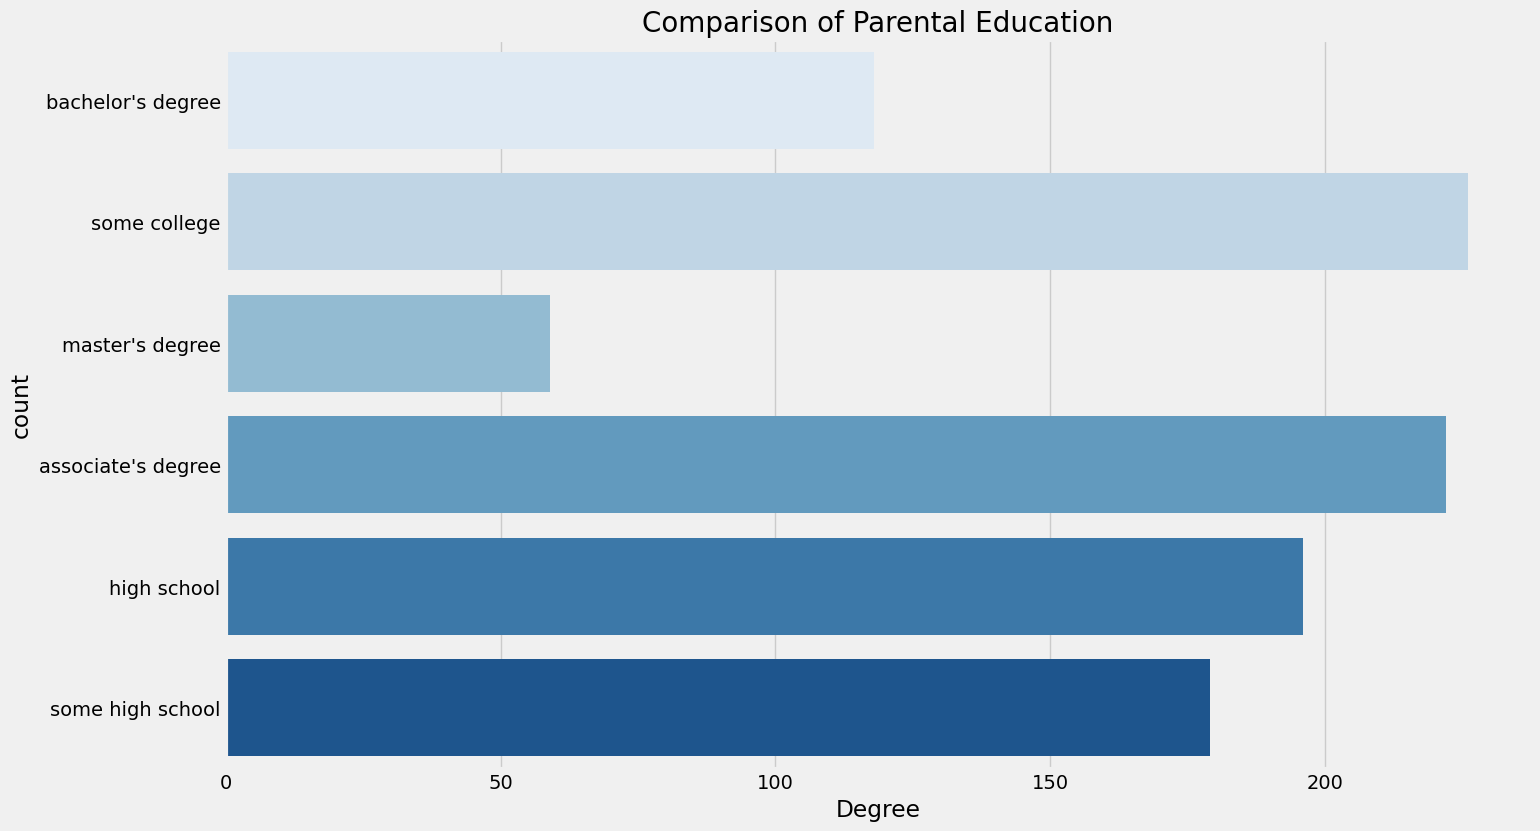

In [28]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sb.countplot(rawdf['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

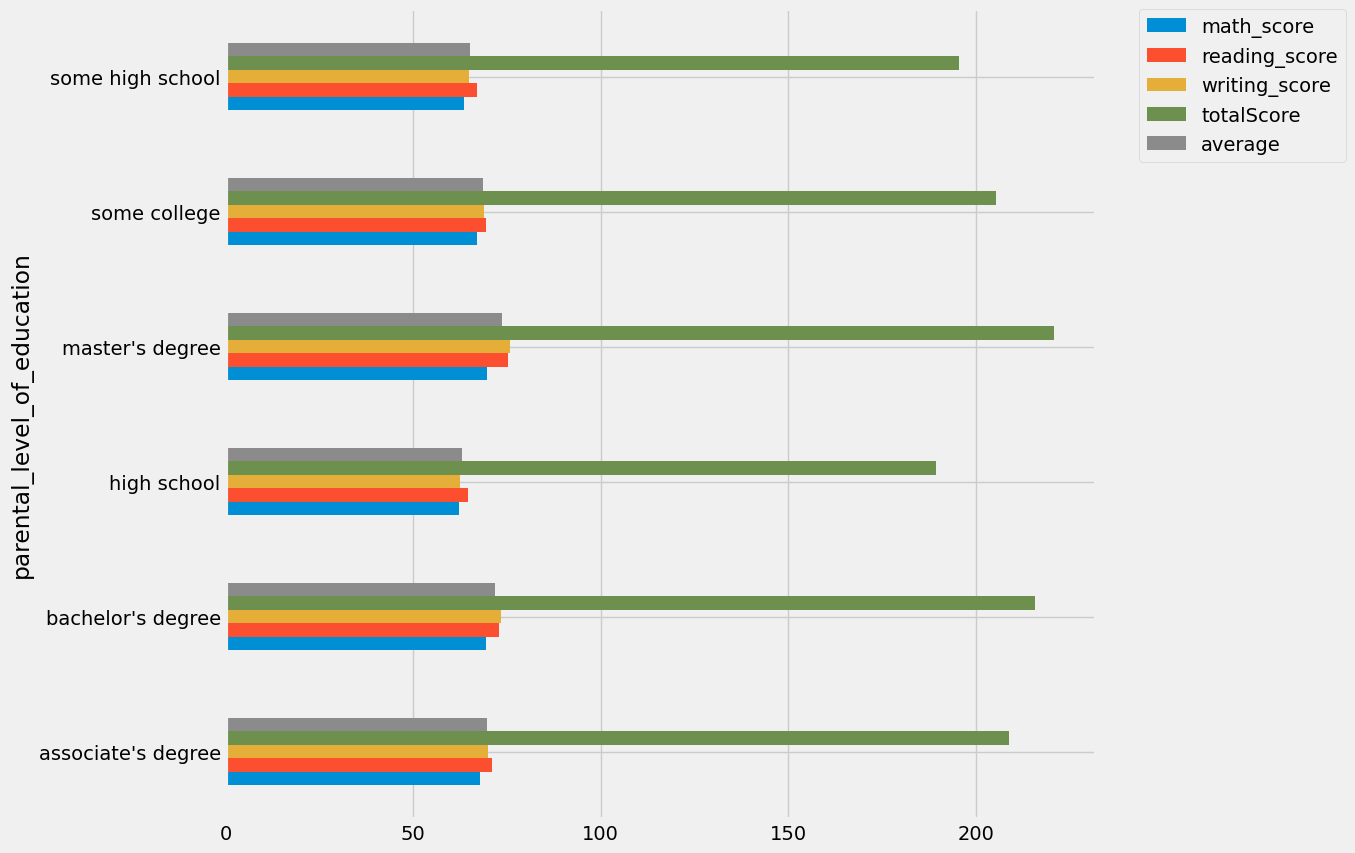

In [29]:

rawdf.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

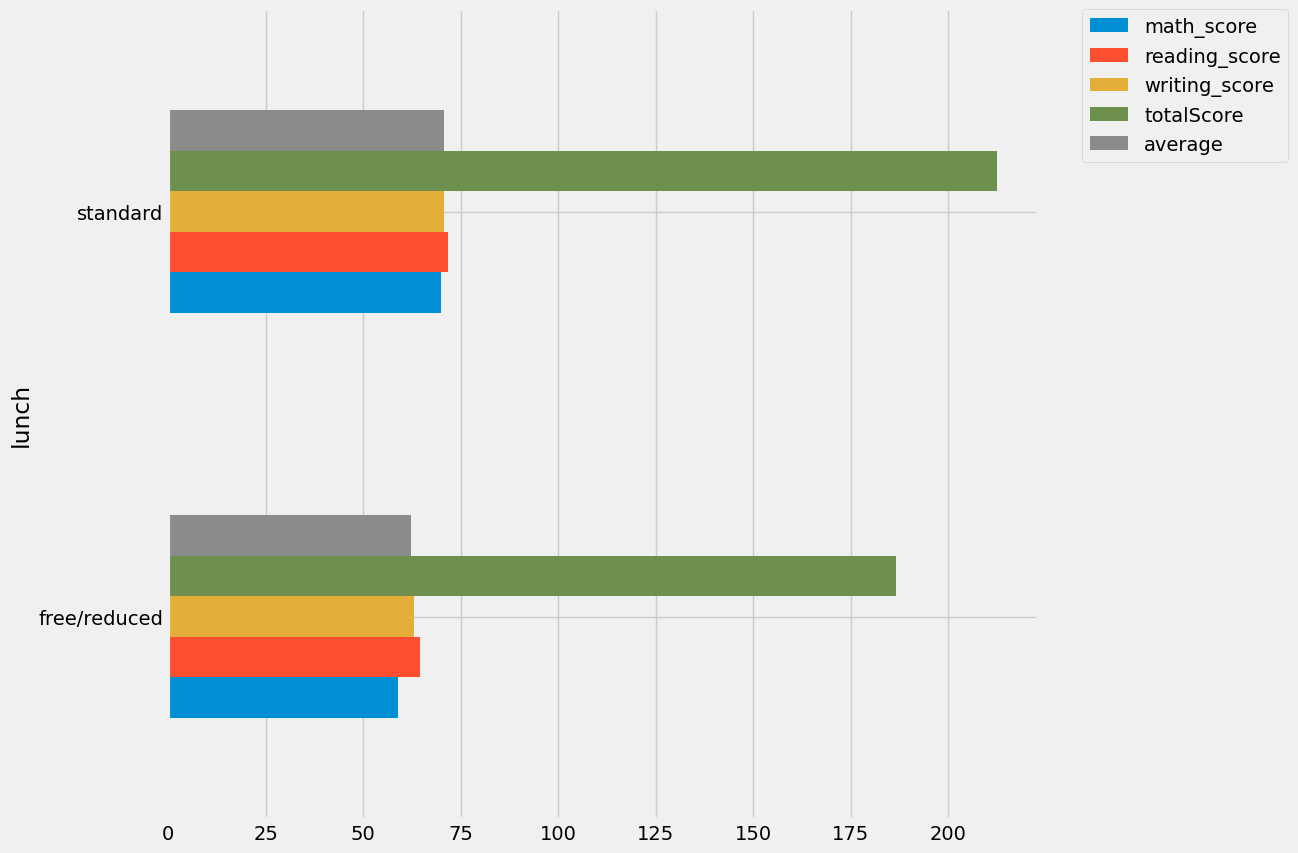

In [30]:
rawdf.groupby('lunch').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

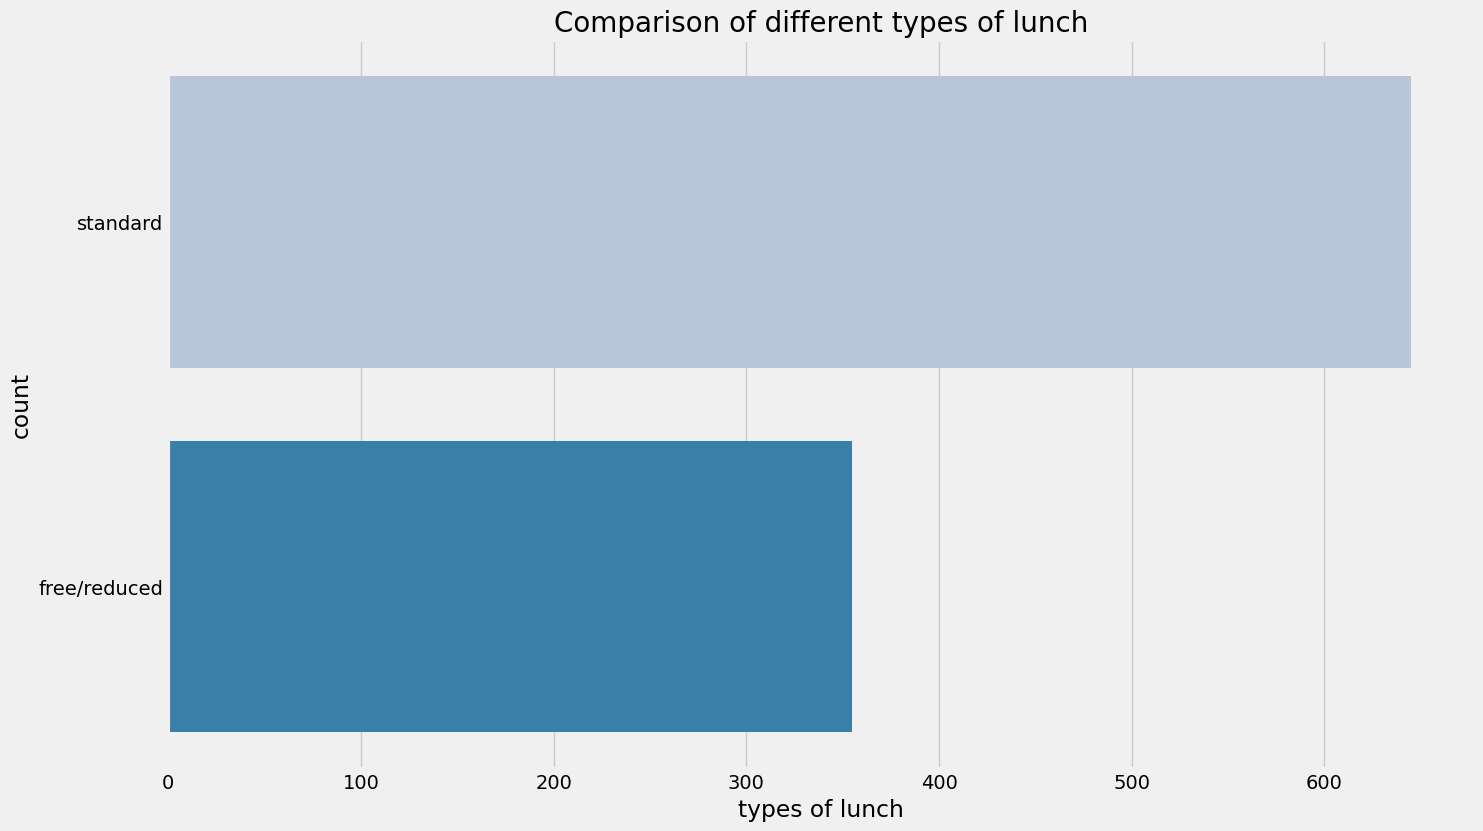

In [31]:

plt.rcParams['figure.figsize'] = (15, 9)
sb.countplot(rawdf['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

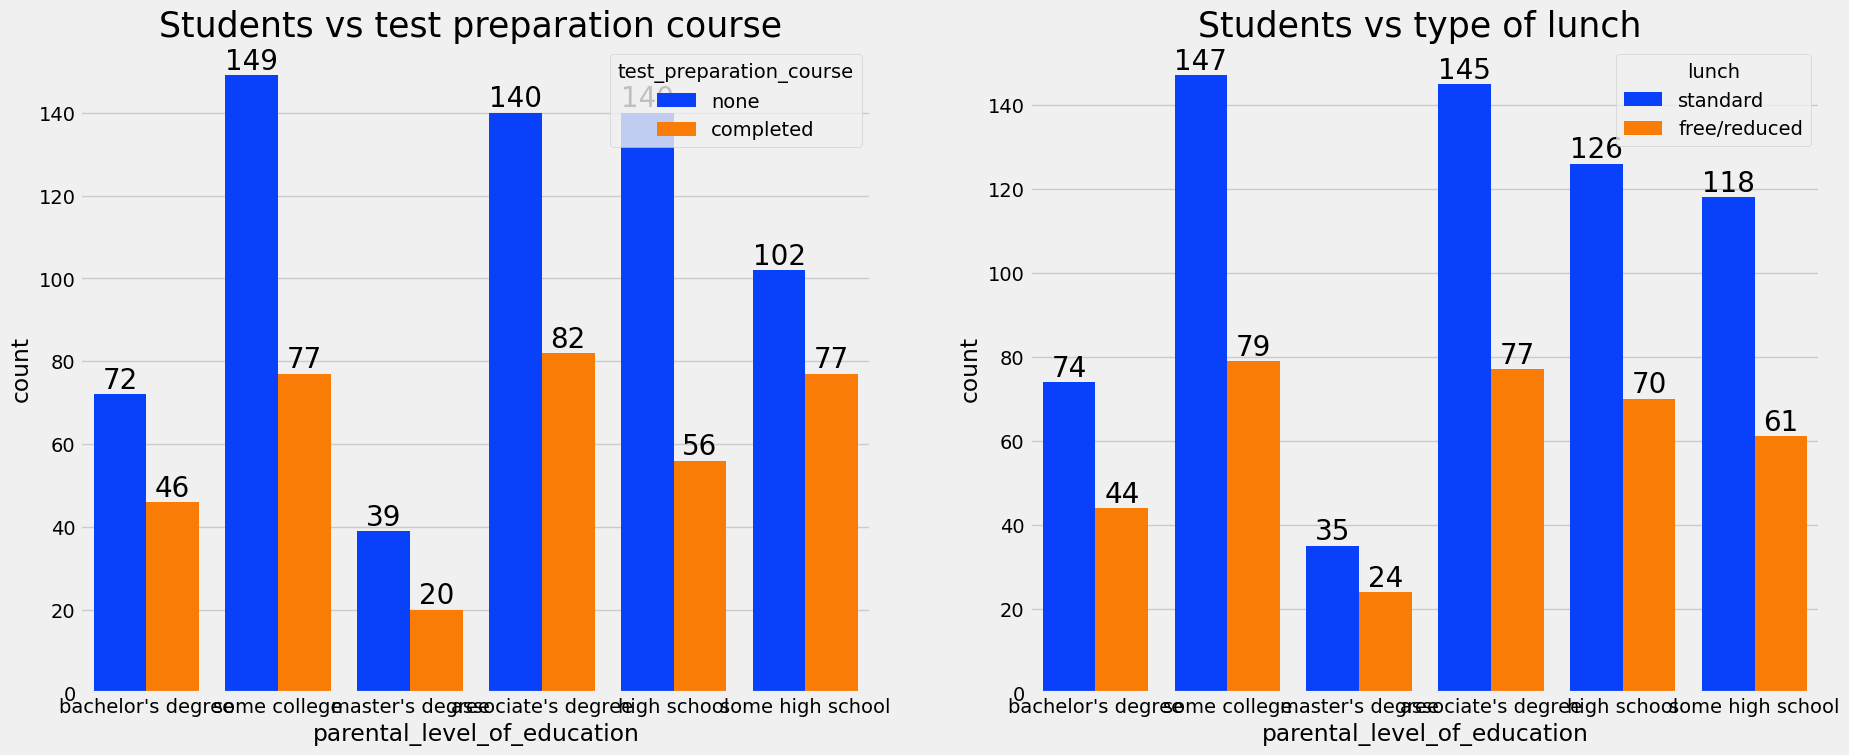

In [32]:

f,ax=plt.subplots(1,2,figsize=(20,8))
sb.countplot(x=rawdf['parental_level_of_education'],data=rawdf,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sb.countplot(x=rawdf['parental_level_of_education'],data=rawdf,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('Students vs type of lunch ',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

<Axes: xlabel='lunch', ylabel='writing_score'>

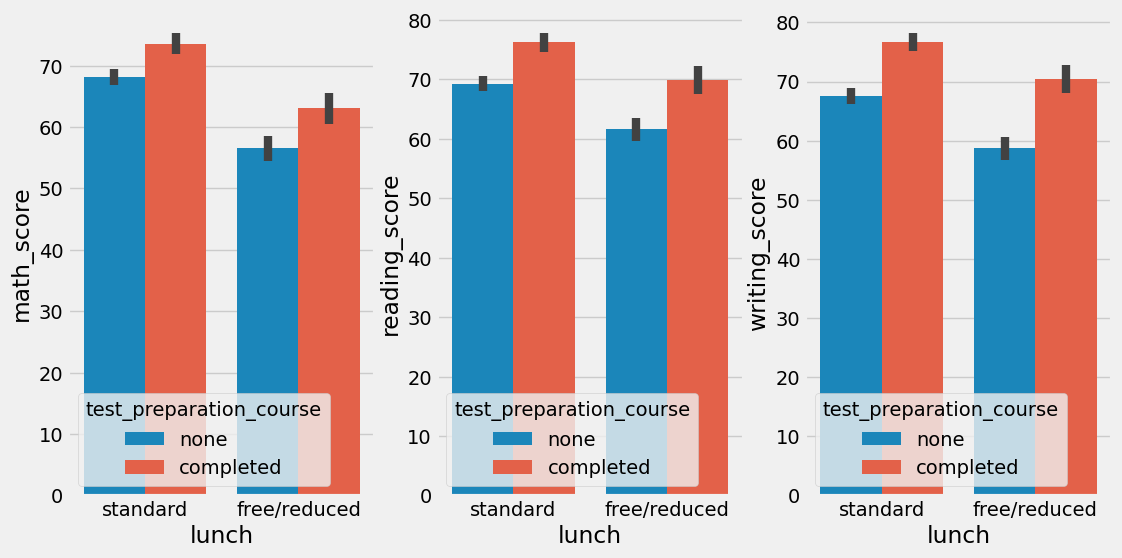

In [33]:

plt.figure(figsize=(12,6))
plt.subplot(131)
sb.barplot (x=rawdf['lunch'], y=rawdf['math_score'], hue=rawdf['test_preparation_course'])
plt.subplot(132)
sb.barplot (x=rawdf['lunch'], y=rawdf['reading_score'], hue=rawdf['test_preparation_course'])
plt.subplot(133)
sb.barplot (x=rawdf['lunch'], y=rawdf['writing_score'], hue=rawdf['test_preparation_course'])

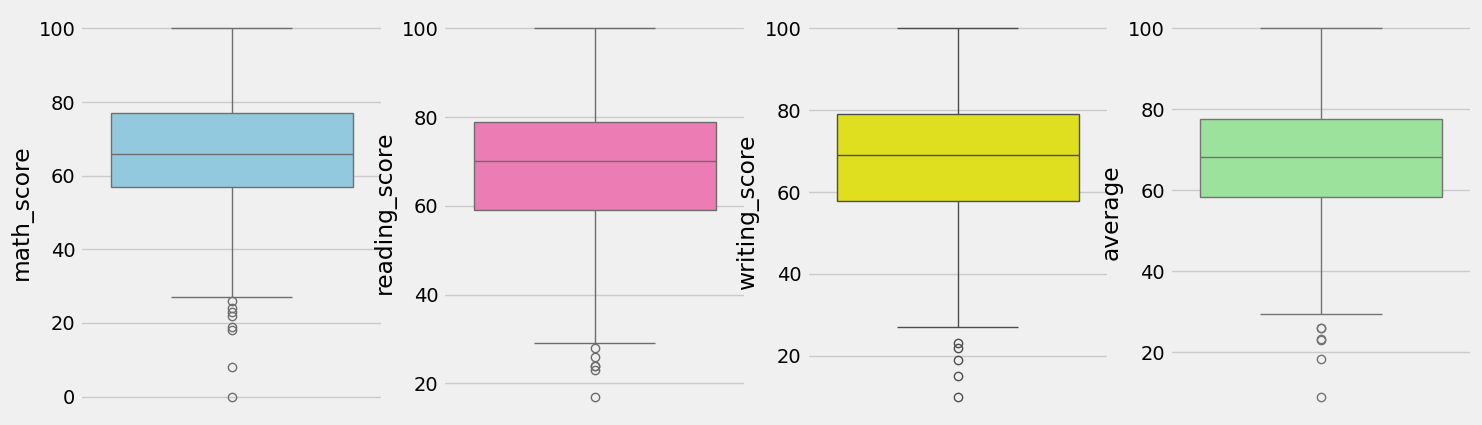

In [34]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sb.boxplot(rawdf['math_score'],color='skyblue')
plt.subplot(142)
sb.boxplot(rawdf['reading_score'],color='hotpink')
plt.subplot(143)
sb.boxplot(rawdf['writing_score'],color='yellow')
plt.subplot(144)
sb.boxplot(rawdf['average'],color='lightgreen')
plt.show()

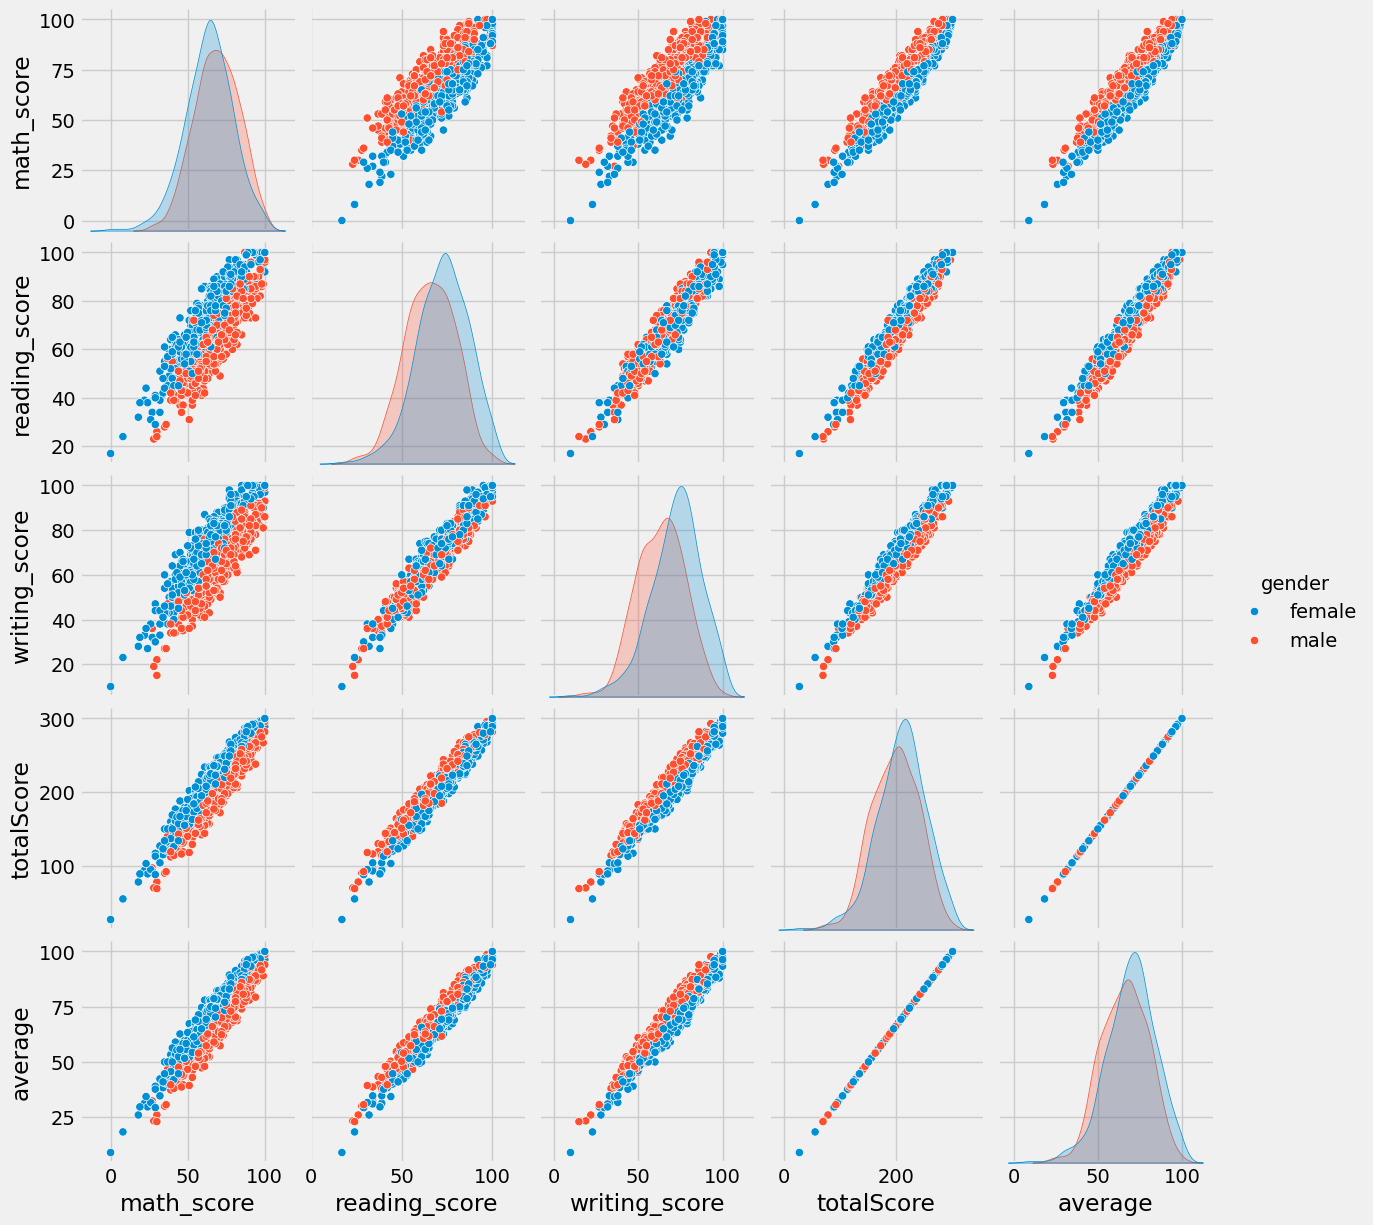

In [35]:

sb.pairplot(rawdf,hue = 'gender')
plt.show()

Student's Performance is related with lunch, race, parental level education<br>
Females lead in pass percentage and also are top-scorers<br>
Student's Performance is not much related with test preparation course<br>
Finishing preparation course is benefitial.<br>

In [36]:
rawdf.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'totalScore', 'average'],
      dtype='object')

<Axes: xlabel='None'>

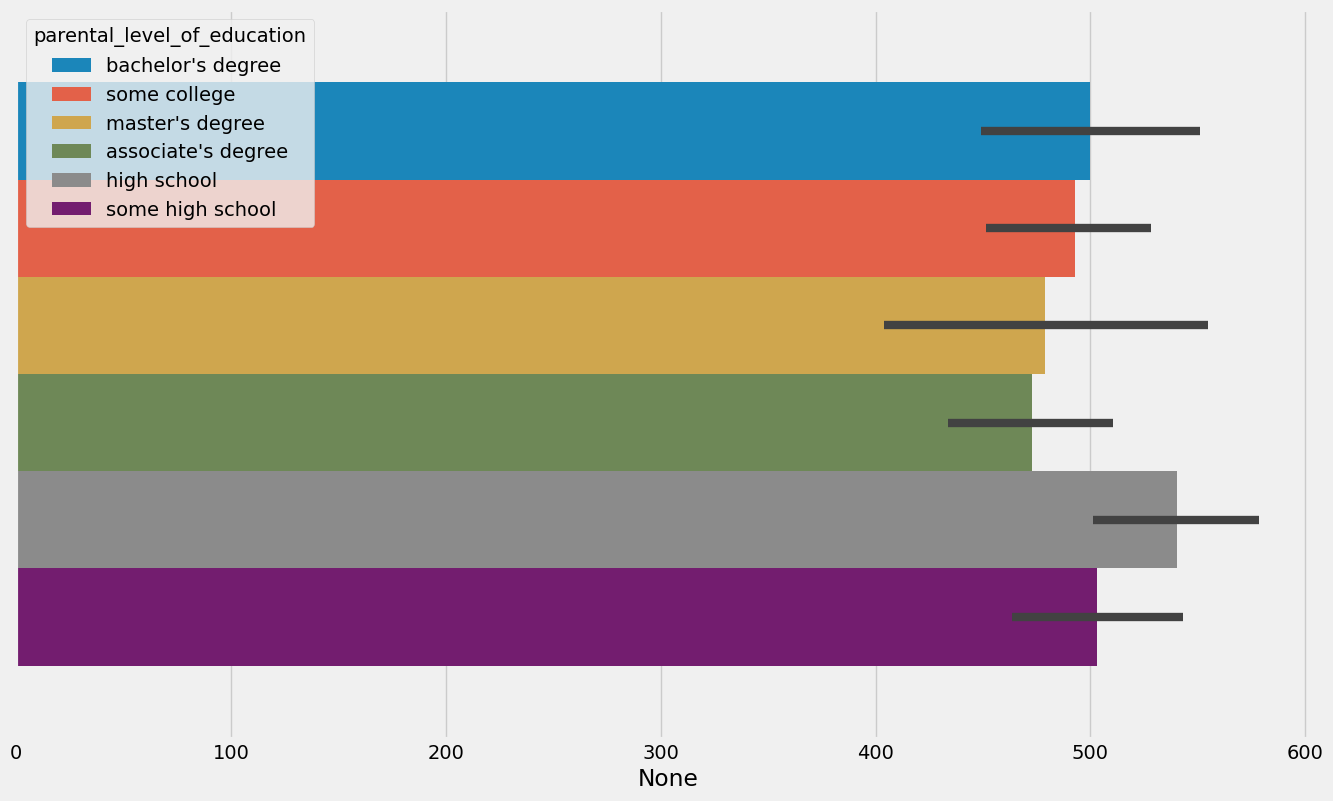

In [37]:
sb.barplot(data=rawdf, x=rawdf['totalScore'].index, hue='parental_level_of_education')